# All graphs are not visible in Github normal mode. Please select the option of viewing in nbviewer. The option is available on the upper right corner just below the menu bar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#Load data
show = pd.read_csv('C:\\Users\\shiva\\Desktop\\Showwcase\\showwcase_sessions.csv')
show

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/2019,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241,24520,10/30/2019,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002,32047,10/30/2019,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113,23404,10/30/2019,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269,40235,10/30/2019,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212,40572,10/1/2019,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0
296,558332,87323,10/1/2019,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0
297,643880,51243,10/1/2019,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518,23083,10/1/2019,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0


In [4]:
#Check uniqueness of session id to maintain data integrity
(show['session_id'].value_counts() > 1).any()

False

In [5]:
#Check for Null values
show.isna().any()

session_id                False
customer_id               False
login_date                False
projects_added            False
likes_given               False
comment_given             False
inactive_status           False
bug_occured               False
session_projects_added    False
session_likes_given        True
session_comments_given    False
inactive_duration         False
bugs_in_session           False
session_duration          False
dtype: bool

In [6]:
show[show['session_likes_given'].isna()]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128,23404,10/26/2019,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0


In [7]:
#Fix null value
show[show['session_likes_given'].isna()]['session_likes_given']=0.0

In [8]:
#Convert to Date format
show['login_date'] = pd.to_datetime(show['login_date'])


In [9]:
type(show['session_duration'])

pandas.core.series.Series

In [10]:
#Get time duration in minutes
show['session_duration'] = show['session_duration']/60
show['inactive_duration'] = show['inactive_duration']/60

show.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,19.100000,0.0,26.066667
1,624241,24520,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,2.216667,0.0,29.433333
2,111002,32047,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,26.183333,0.0,37.166667
3,545113,23404,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.000000,0.0,10.550000
4,750269,40235,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,23.416667,0.0,27.983333


In [25]:
#Graph to show Customer traffic
fig = show.groupby('login_date')[['session_id','customer_id']].nunique().iplot(title='Customer Traffic per day', xTitle='Login_Date', yTitle='Value_Count')


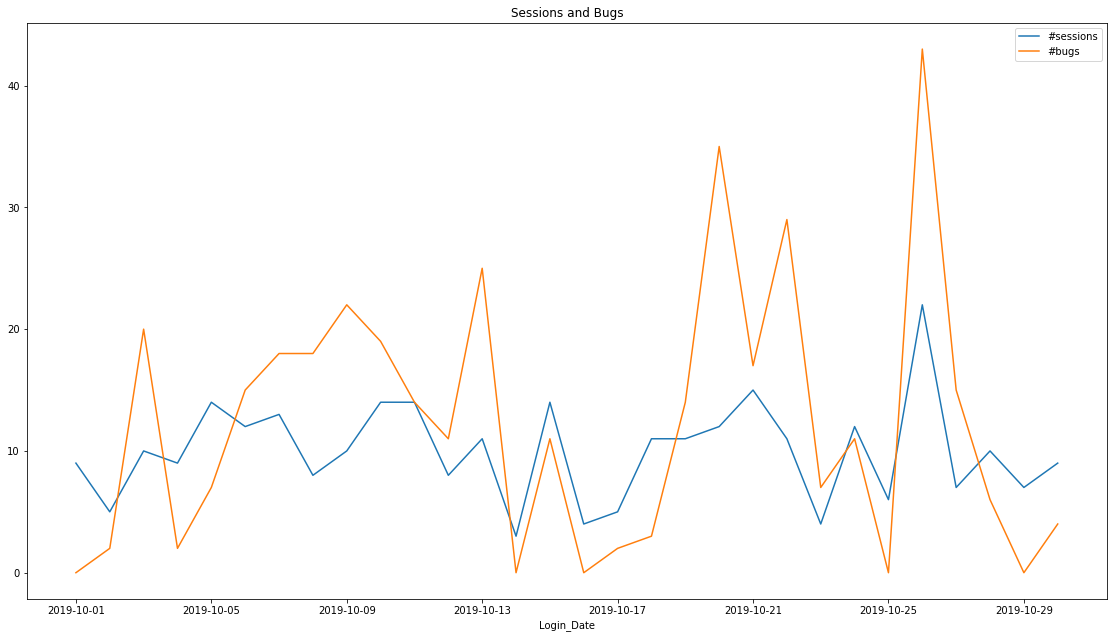

In [12]:
#Graph to show comaprison of Bugs and session counts
fig = plt.figure(figsize=(15, 8))

ax = fig.add_axes([0,0,1,1])

ax.plot(show.groupby('login_date').count()['session_id'], label = '#sessions')
ax.plot(show.groupby('login_date').sum()['bugs_in_session'], label = '#bugs')
ax.set_xlabel('Login_Date')
ax.set_title('Sessions and Bugs')
ax.legend()

In [13]:
#Graph to show bugs encountered by per customer
show.groupby(['login_date','customer_id']).sum()['bugs_in_session'].iplot(title='Bugs per Customer', xTitle='Date and Customer_id', yTitle='Bugs')

In [14]:
#Graph to show number of Bugs per session
show.groupby(['login_date','session_id']).sum()['bugs_in_session'].iplot(title='Bugs per session', xTitle='Date and session_id', yTitle='Bugs')

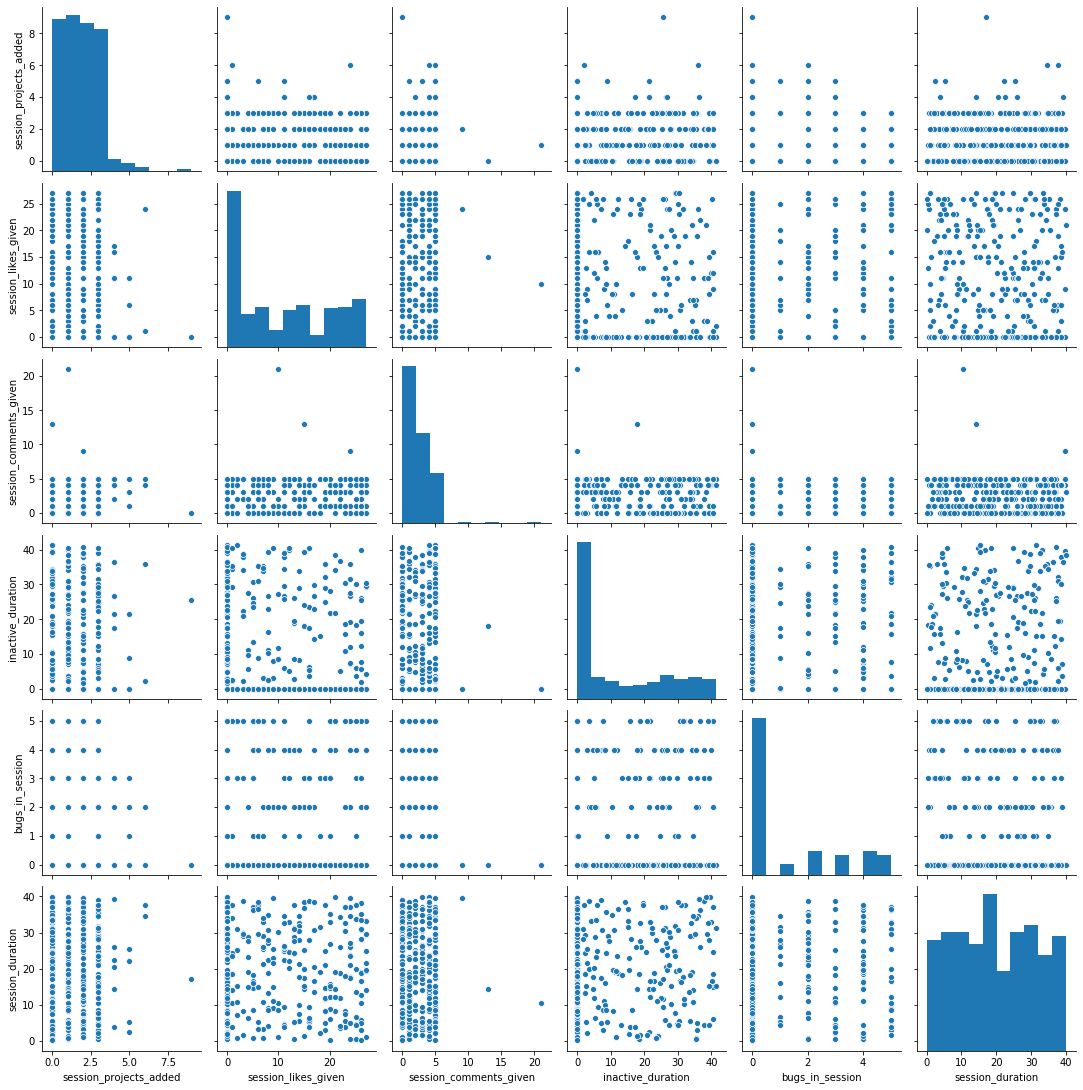

In [15]:
#Plot to analyse relationship between raw data

pic = sns.pairplot(show[show.columns[8:14]])
pic.savefig('raw.png')


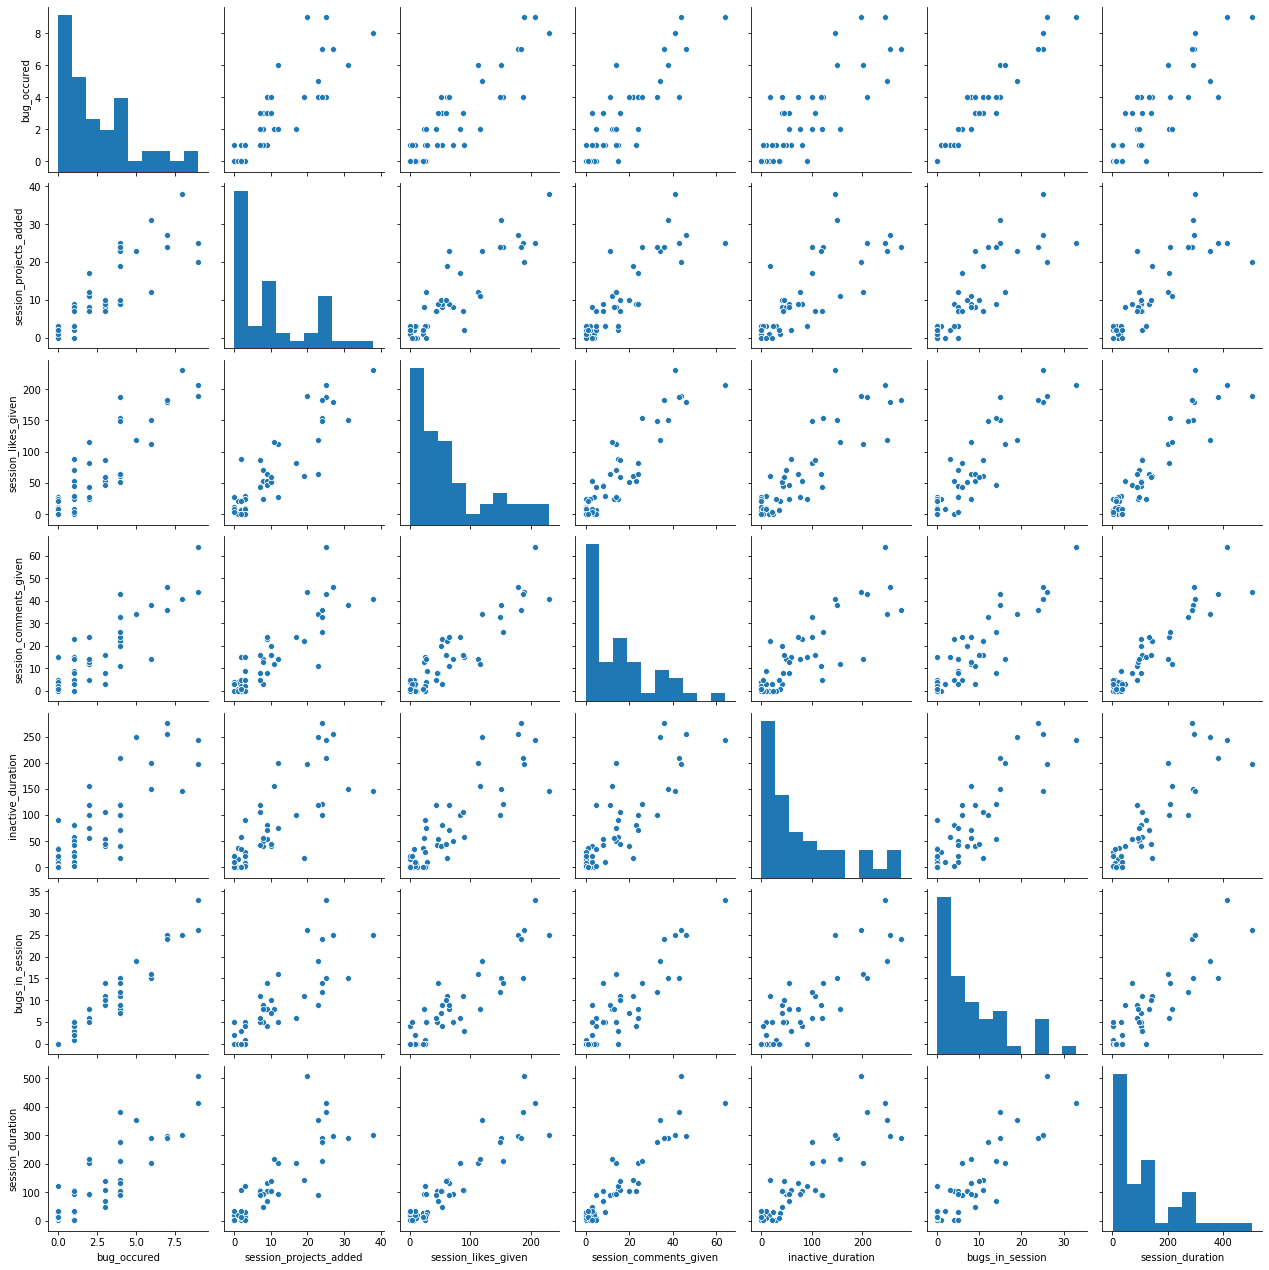

In [16]:
#Plot to analyse data based on Customer aggregates
cust = pd.DataFrame(show.groupby('customer_id',as_index=True).sum()).reset_index()
cust[cust.columns[7:14]]
pic2 = sns.pairplot(cust[cust.columns[6:14]])
pic2.savefig('user.png')

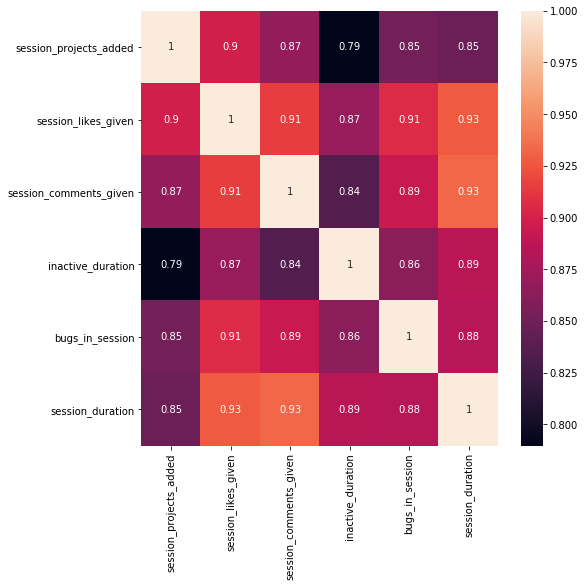

In [17]:
#Visualize correlations
plt.figure(figsize=(8,8))
sns.heatmap(cust[cust.columns[7:14]].corr(),annot=True)

In [18]:
#Get Top 10 customers with most number of Projects Added
top_proj = pd.DataFrame(cust.sort_values(by='session_projects_added', ascending=False)[['customer_id','session_projects_added']].head(10))
top_proj

,customer_id,session_projects_added
40,87323,38.0
4,14354,31.0
25,40572,27.0
9,23404,25.0
22,38459,25.0
39,87265,24.0
34,73245,24.0
32,51243,24.0
24,40235,23.0
35,73524,23.0


[Text(0, 0.5, 'session_projects_added'),
 Text(0.5, 0, 'customer_id'),
 Text(0.5, 1.0, 'Top 10 Customers (#Projects Added)')]

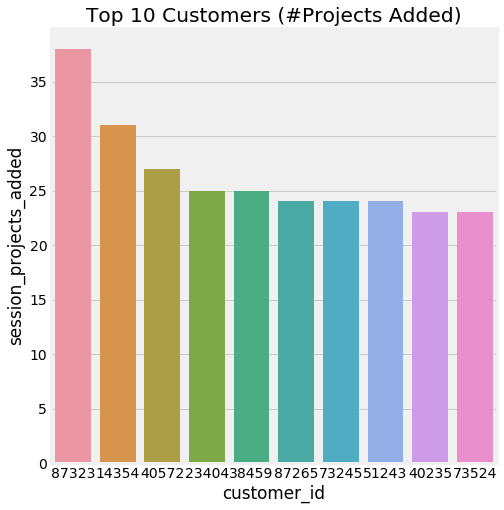

In [19]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
ax=sns.barplot(x = 'customer_id', y = 'session_projects_added', data = top_proj, order=top_proj.sort_values('session_projects_added',ascending=False).customer_id)
ax.set(ylabel='session_projects_added', xlabel='customer_id' , title='Top 10 Customers (#Projects Added)')

In [20]:
#Get Top 10 customers with most number of Likes given
top_likes = pd.DataFrame(cust.sort_values(by='session_likes_given', ascending=False)[['customer_id','session_likes_given']].head(10))
top_likes

,customer_id,session_likes_given
40,87323,230.0
9,23404,207.0
18,29375,189.0
22,38459,187.0
34,73245,183.0
25,40572,179.0
32,51243,154.0
4,14354,150.0
39,87265,149.0
24,40235,119.0


[Text(0, 0.5, 'session_likes_given'),
 Text(0.5, 0, 'customer_id'),
 Text(0.5, 1.0, 'Top 10 Customers (#Likes Given)')]

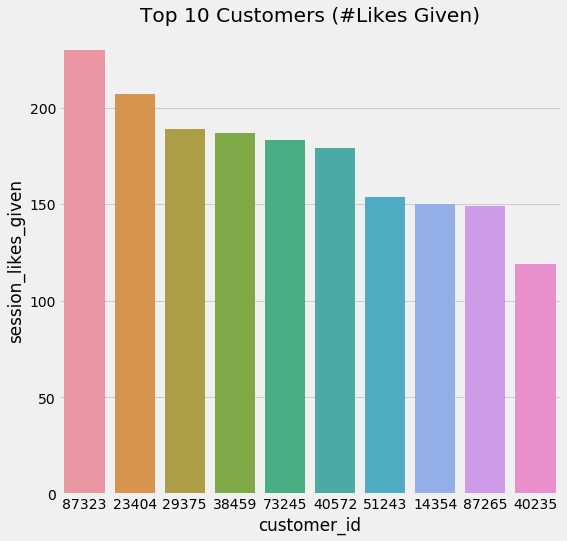

In [21]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
ax=sns.barplot(x = 'customer_id', y = 'session_likes_given', data = top_likes, order=top_likes.sort_values('session_likes_given',ascending=False).customer_id)
ax.set(ylabel='session_likes_given', xlabel='customer_id' , title='Top 10 Customers (#Likes Given)')

In [22]:
#Get Top 10 customers with most number of Comments given
top_comments = pd.DataFrame(cust.sort_values(by='session_comments_given', ascending=False)[['customer_id','session_comments_given']].head(10))
top_comments

,customer_id,session_comments_given
9,23404,64.0
25,40572,46.0
18,29375,44.0
22,38459,43.0
40,87323,41.0
4,14354,38.0
34,73245,36.0
24,40235,34.0
39,87265,33.0
32,51243,26.0


[Text(0, 0.5, 'session_Comments_given'),
 Text(0.5, 0, 'customer_id'),
 Text(0.5, 1.0, 'Top 10 Customers (#Comments Given)')]

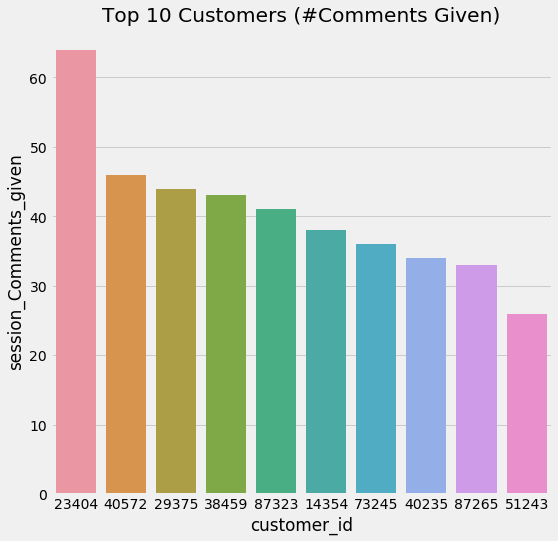

In [23]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
ax=sns.barplot(x = 'customer_id', y = 'session_comments_given', data = top_comments, order=top_comments.sort_values('session_comments_given',ascending=False).customer_id)
ax.set(ylabel='session_Comments_given', xlabel='customer_id' , title='Top 10 Customers (#Comments Given)')